In [27]:
from operator import contains

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/Rotten Tomatoes Movies.csv')

In [3]:
movies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [5]:
movies.shape

(16638, 17)

In [6]:
movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date)

In [7]:
movies_after_2010 = movies[movies['in_theaters_date'].dt.year >= 2010]
movies_after_2010.shape

(6053, 17)

In [8]:
movies_after_2010.in_theaters_date.value_counts().index.min()

Timestamp('2010-01-01 00:00:00')

In [9]:
#Highest rated movies by both critics and audiences
df_critics = (movies_after_2010[movies_after_2010.tomatometer_rating == movies_after_2010
                    .tomatometer_rating.max()][['movie_title','tomatometer_rating']])

In [10]:
df_audience = (movies_after_2010[movies_after_2010.audience_rating == movies_after_2010
                    .audience_rating.max()][['movie_title','audience_rating']])

In [11]:
df_critics.join(df_audience,how='inner',lsuffix='_critics', rsuffix='_audeince')

,movie_title_critics,tomatometer_rating,movie_title_audeince,audience_rating
4239,Charm City,100,Charm City,100.0
14566,The Miners' Hymns,100,The Miners' Hymns,100.0
15001,The Uncondemned,100,The Uncondemned,100.0


In [12]:
#Find most popular movies (more than 100K audiences)
movies_popular = movies_after_2010[movies_after_2010.audience_count > 100000]


In [13]:
movies_popular.loc[:,['movie_title','audience_count']].sort_values('audience_count',ascending=False)

,movie_title,audience_count
1646,Shutter Island,2373625.0
13936,The Dark Knight Rises,1210957.0
9581,Marvel's The Avengers,1134955.0
14297,The Hunger Games,902294.0
13673,The Amazing Spider-Man,815218.0
...,...,...
7262,Her,100892.0
10425,Night at the Museum: Secret of the Tomb,100855.0
13081,Step Up 3,100526.0
274,Repo Men,100453.0


In [14]:
movies_popular.sort_values(['tomatometer_rating','audience_rating'],ascending=[True,False])[['movie_title','tomatometer_rating','audience_rating']]

,movie_title,tomatometer_rating,audience_rating
12198,Scary Movie 5,4,38.0
3387,"Big Mommas: Like Father, Like Son",5,58.0
8714,The Last Airbender,5,30.0
6942,Grown Ups 2,7,53.0
9037,Little Fockers,9,34.0
...,...,...,...
16634,Zootopia,97,92.0
9355,Mad Max: Fury Road,97,85.0
7925,Inside Out,98,89.0
15416,Toy Story 3,98,89.0


In [20]:
#number of movies under each rating
movies_after_2010.rating.value_counts()

rating
NR        2317
R         2112
PG-13     1096
PG         461
G           60
NC17         5
PG-13)       1
R)           1
Name: count, dtype: int64

In [17]:
#Average audience ratings for each rating type
movies_popular.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

In [19]:
#Create a column called 'Animation' and return a 1 if a movie is animation or 0 otherwise. Do the same for 'Action & Adventure' and 'Comedy'
movies_after_2010.genre.value_counts()

genre
Drama                                                            972
Comedy                                                           452
Documentary                                                      329
Comedy, Drama                                                    315
Documentary, Special Interest                                    296
                                                                ... 
Comedy, Horror, Mystery & Suspense, Science Fiction & Fantasy      1
Action & Adventure, Drama, Horror, Western                         1
Comedy, Western                                                    1
Animation, Art House & International, Comedy                       1
Animation, Drama, Romance                                          1
Name: count, Length: 424, dtype: int64

In [25]:
movies_after_2010.genre.value_counts()

genre
Drama                                                            972
Comedy                                                           452
Documentary                                                      329
Comedy, Drama                                                    315
Documentary, Special Interest                                    296
                                                                ... 
Comedy, Horror, Mystery & Suspense, Science Fiction & Fantasy      1
Action & Adventure, Drama, Horror, Western                         1
Comedy, Western                                                    1
Animation, Art House & International, Comedy                       1
Animation, Drama, Romance                                          1
Name: count, Length: 424, dtype: int64

In [34]:
movies_after_2010.loc[:,'Animation'] = np.where(movies_after_2010.genre.str.contains('Animation'),1,0)

In [37]:
movies_after_2010.loc[movies_after_2010.Animation == 1,['movie_title','genre','Animation']]

,movie_title,genre,Animation
1713,Puss in Boots,"Action & Adventure, Animation, Comedy, Kids & ...",1
1726,Howl,"Animation, Drama, Special Interest",1
1766,Despicable Me,"Animation, Comedy, Kids & Family",1
1927,400 Days,NaN,1
2027,A Cat in Paris,"Animation, Art House & International, Comedy, ...",1
...,...,...,...
16514,Yarn,"Animation, Art House & International, Documentary",1
16537,Yogi Bear,"Action & Adventure, Animation, Comedy, Kids & ...",1
16582,Your Name. (Kimi No Na Wa.),"Animation, Drama, Romance",1
16603,Zarafa,"Animation, Kids & Family",1


In [40]:
movies_after_2010.loc[:,'Action & Adventure'] = np.where(movies_after_2010.genre.str.contains('Action & Adventure'),1,0)

In [43]:
movies_after_2010.loc[:,'Comedy'] = np.where(movies_after_2010.genre.str.contains('Comedy'),1,0)

In [44]:
movies_after_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6053 entries, 0 to 16634
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         6053 non-null   object        
 1   movie_info          6052 non-null   object        
 2   critics_consensus   3213 non-null   object        
 3   rating              6053 non-null   object        
 4   genre               6048 non-null   object        
 5   directors           5999 non-null   object        
 6   writers             5507 non-null   object        
 7   cast                5893 non-null   object        
 8   in_theaters_date    6053 non-null   datetime64[ns]
 9   on_streaming_date   6053 non-null   object        
 10  runtime_in_minutes  5930 non-null   float64       
 11  studio_name         5912 non-null   object        
 12  tomatometer_status  6053 non-null   object        
 13  tomatometer_rating  6053 non-null   int64         
 

In [49]:
#Create a table where each row is a rating, each column is a genre, and each value is the number of movies in that particular rating and genre.
movies_rating_genre = pd.pivot_table(data=movies_after_2010,index='rating',columns='genre',values='movie_title',aggfunc='count')

In [50]:
movies_rating_genre

genre,Action & Adventure,"Action & Adventure, Animation","Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy","Action & Adventure, Animation, Art House & International","Action & Adventure, Animation, Art House & International, Drama","Action & Adventure, Animation, Art House & International, Kids & Family","Action & Adventure, Animation, Comedy","Action & Adventure, Animation, Comedy, Kids & Family","Action & Adventure, Animation, Comedy, Kids & Family, Musical & Performing Arts, Romance","Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy",...,"Mystery & Suspense, Science Fiction & Fantasy, Western","Mystery & Suspense, Special Interest","Mystery & Suspense, Television","Mystery & Suspense, Western",Romance,Science Fiction & Fantasy,"Science Fiction & Fantasy, Romance","Science Fiction & Fantasy, Western",Special Interest,Western
rating,,,,,,,,,,,,,,,,,,,,,
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR,22.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,4.0,8.0,NaN,NaN,2.0,3.0
PG,3.0,NaN,NaN,3.0,NaN,NaN,8.0,20.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
PG-13,26.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN
PG-13),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,2.0,5.0,4.0,NaN,1.0,NaN,2.0
R),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
movies_after_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6053 entries, 0 to 16634
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         6053 non-null   object        
 1   movie_info          6052 non-null   object        
 2   critics_consensus   3213 non-null   object        
 3   rating              6053 non-null   object        
 4   genre               6048 non-null   object        
 5   directors           5999 non-null   object        
 6   writers             5507 non-null   object        
 7   cast                5893 non-null   object        
 8   in_theaters_date    6053 non-null   datetime64[ns]
 9   on_streaming_date   6053 non-null   object        
 10  runtime_in_minutes  5930 non-null   float64       
 11  studio_name         5912 non-null   object        
 12  tomatometer_status  6053 non-null   object        
 13  tomatometer_rating  6053 non-null   int64         
 

In [56]:
#Find the average critic and audeince ratings for for an Animation movie vs a non-Animation movie
(movies_after_2010
                .groupby('Animation')
                .agg(average_critic_rating=('tomatometer_rating','mean'),
                     average_audience_rating=('audience_rating','mean'))
 )

,average_critic_rating,average_audience_rating
Animation,,
0,59.916552,57.040585
1,63.585253,65.144186


In [57]:
#Find the average critic and audeince ratings for for an Action & Adventure movie vs a non-Animation movie
(movies_after_2010
                .groupby('Action & Adventure')
                .agg(average_critic_rating=('tomatometer_rating','mean'),
                     average_audience_rating=('audience_rating','mean'))
 )

,average_critic_rating,average_audience_rating
Action & Adventure,,
0,61.709562,57.771480
1,51.672655,55.155311


In [58]:
#Find the average critic and audeince ratings for for an Comedy movie vs a non-Animation movie
(movies_after_2010
                .groupby('Comedy')
                .agg(average_critic_rating=('tomatometer_rating','mean'),
                     average_audience_rating=('audience_rating','mean'))
 )

,average_critic_rating,average_audience_rating
Comedy,,
0,62.199025,58.573493
1,53.750162,53.735429


In [63]:
movies_popular.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
248,Tron Legacy,The Master Control Program is booted back up i...,"Tron Legacy boasts dazzling visuals, but its h...",PG,"Action & Adventure, Science Fiction & Fantasy",Joseph Kosinski,"Edward Kitsis, Adam Horowitz, Steven Lisberger...","Jeff Bridges, Garrett Hedlund, Olivia Wilde, B...",2010-12-17,2011-04-05,125.0,Walt Disney Pictures,Rotten,51,239,63.0,171385.0
265,The Last Song,Based on best-selling novelist Nicholas Sparks...,As shamelessly manipulative as any Nicholas Sp...,PG,"Drama, Kids & Family, Romance",Julie Ann Robinson,"Nicholas Sparks, Jeff Van Wie","Miley Cyrus, Greg Kinnear, Bobby Coleman, Liam...",2010-03-31,2010-08-17,107.0,Walt Disney Studios,Rotten,20,118,66.0,160777.0
274,Repo Men,"In the futuristic action-thriller ""Repo Men,"" ...","Repo Men has an intriguing premise, as well as...",R,"Action & Adventure, Science Fiction & Fantasy",Miguel Sapochnik,"Eric Garcia, Garrett Lerner","Jude Law, Forest Whitaker, Alice Braga, Liev S...",2010-03-19,2010-07-27,119.0,Universal Studios,Rotten,22,151,41.0,100453.0
284,Predators,A group of hardened killers are hunted on an a...,"After a string of subpar sequels, this bloody,...",R,"Action & Adventure, Horror, Science Fiction & ...",Nimród Antal,"Alex Litvak, Michael Finch","Adrien Brody, Topher Grace, Alice Braga, Walto...",2010-07-09,2010-10-19,107.0,20th Century Fox,Fresh,65,198,52.0,159760.0


In [67]:
#Create a pair plot for from the popular movies
movies_numeric = movies_popular.select_dtypes(include='number')

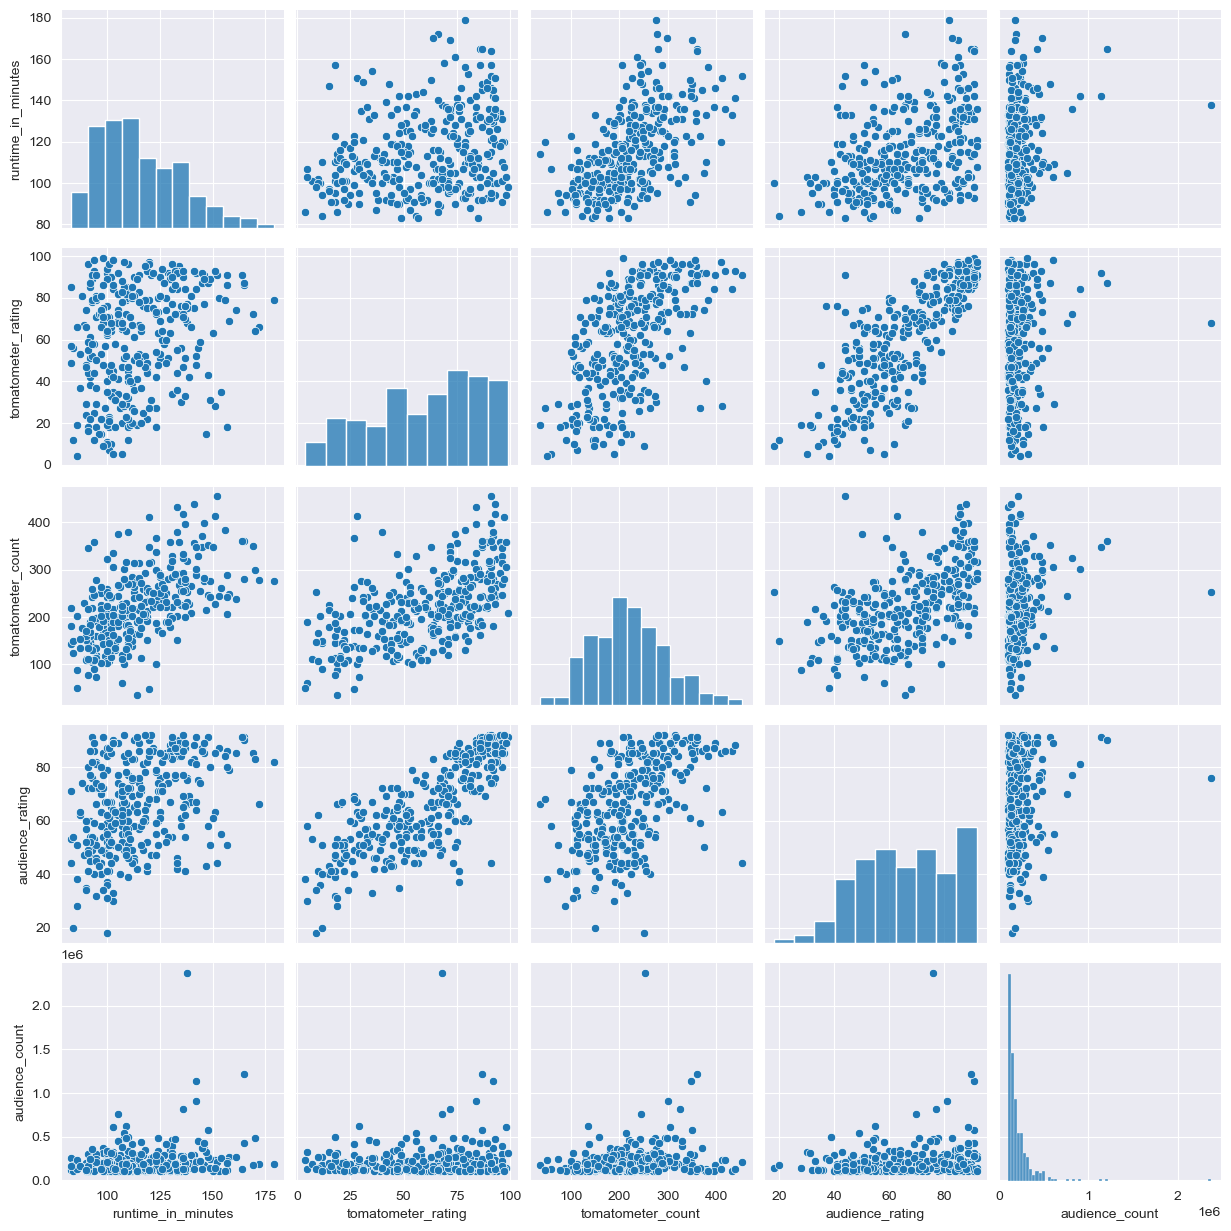

In [70]:
sns.pairplot(movies_numeric);

In [71]:
movies_numeric.corr()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
runtime_in_minutes,1.000000,0.261717,0.581755,0.396743,0.225332
tomatometer_rating,0.261717,1.000000,0.581145,0.798293,0.098334
tomatometer_count,0.581755,0.581145,1.000000,0.528196,0.192638
audience_rating,0.396743,0.798293,0.528196,1.000000,0.158131
audience_count,0.225332,0.098334,0.192638,0.158131,1.000000


In [72]:
movies_popular[movies_popular.audience_count > 1000000]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
1646,Shutter Island,Martin Scorsese and Leonardo DiCaprio team up ...,"It may not rank with Scorsese's best work, but...",R,"Action & Adventure, Drama, Mystery & Suspense",Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",2010-02-19,2010-06-08,138.0,Paramount Studios,Fresh,68,253,76.0,2373625.0
9581,Marvel's The Avengers,Marvel Studios presents Marvel's The Avengers-...,Thanks to a script that emphasizes its heroes'...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Joss Whedon,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2012-05-04,2012-09-25,142.0,Walt Disney Pictures,Certified Fresh,92,348,91.0,1134955.0
13936,The Dark Knight Rises,It has been eight years since Batman vanished ...,"The Dark Knight Rises is an ambitious, thought...",PG-13,"Action & Adventure, Drama, Mystery & Suspense",Christopher Nolan,"Christopher Nolan, Jonathan Nolan, Bob Kane","Christian Bale, Michael Caine, Gary Oldman, An...",2012-07-20,2012-12-03,165.0,Warner Bros. Pictures,Certified Fresh,87,360,90.0,1210957.0
